# ライブラリの読み込み

In [ ]:
# 認知行動課題作成用
import itertools

# 乱数生成用
import random

# フィギュア作成用
import matplotlib.pyplot as plt

# フィギュアの日本語対応化
!pip3 install matplotlib_fontja  # Colab上にインストール
import matplotlib_fontja

# 数値や行列の計算用
import numpy as np

# [1] ニューラルネットワーク用
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# シード固定(再現性は実行順序にも依存するので注意！)
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

# 活性化関数

In [ ]:
#@title シグモイド関数を定義
def sigmoid(u):
    """標準シグモイド関数. 式(4-1)に相当

    Parameters
    ----------
    u : float or np.ndarray
        ニューロンモデルの内部状態

    Retruns
    -------
    y : float or np.ndarray
        ニューロンモデルの出力
    """
    y = 1 / (1+np.exp(-u))
    return y

In [ ]:
#@title シグモイド関数を実行
# -10から10までの数字を1000等分
inputs = np.linspace(-10, 10, 1000)

# シグモイド関数の計算
outputs = sigmoid(u=inputs)

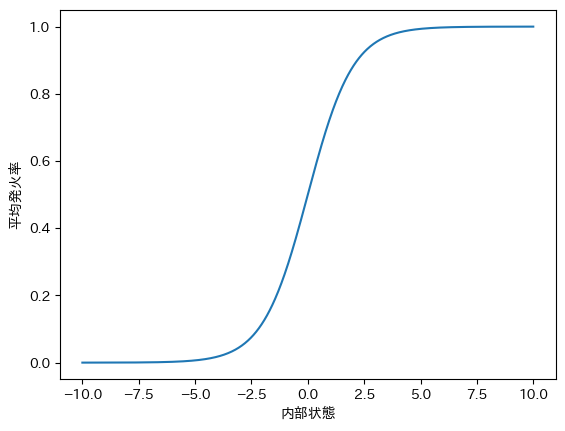

In [ ]:
#@title シグモイド関数をプロット

plt.plot(inputs, outputs)  # シグモイド関数を折れ線プロット
plt.xlabel('内部状態')  # x軸のラベル名
plt.ylabel('平均発火率')  # y軸のラベル名
plt.show()  # 作成したフィギュアを表示

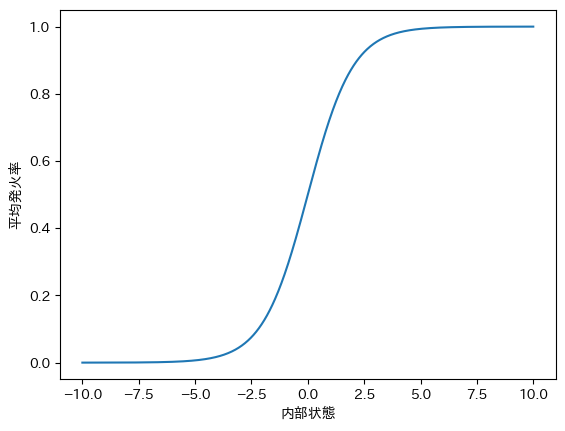

In [ ]:
#@title PyTorchを用いたシグモイド関数

# -10から10までの数字を1000等分
inputs = np.linspace(-10, 10, 1000)

# Numpyの型からPyTorchの型へ変換
inputs = torch.from_numpy(inputs)

# nn.Sigmoidクラスをsigという名称でインスタンス化
sig = nn.Sigmoid()
outputs = sig(inputs)  # 内部的にはsig.call(x)が呼び出される

# プロット
plt.plot(inputs, outputs)
plt.xlabel('内部状態')
plt.ylabel('平均発火率')
plt.show()

# 線形層

In [ ]:
#@title PyTorchを用いた線形層の呼び出し

# 線形層のインスタンス化
# インスタンス化の際に，重みはランダムに決定される
linear = nn.Linear(in_features=5, out_features=2)

In [ ]:
#@title 線形層の動作検証

# 入力用変数の作成
inputs = torch.tensor([0.1, 0.2, 0.3, 0.4, 0.5])

# 線形層の計算. 式(4-2)に相当
outputs = linear(inputs)

# 結果を表示
print('outputs:', outputs)

outputs: tensor([0.5810, 0.1216], grad_fn=<ViewBackward0>)


In [ ]:
#@title 線形層の計算の検算
print('weight:', linear.weight)  # 線形層の重みを出力
print('bias:', linear.bias)  # 線形層のバイアスを出力
outputs = torch.mm(linear.weight, inputs.view(-1, 1)) \
    + linear.bias.view(-1, 1)
print('outputs', outputs)

weight: Parameter containing:
tensor([[ 0.3419,  0.3712, -0.1048,  0.4108, -0.0980],
        [ 0.0902, -0.2177,  0.2626,  0.3942, -0.3281]], requires_grad=True)
bias: Parameter containing:
tensor([0.3887, 0.0837], requires_grad=True)
outputs tensor([[0.5810],
        [0.1216]], grad_fn=<AddBackward0>)


# 多層パーセプトロン

In [ ]:
#@title 多層パーセプトロンの構築

class Perceptron(nn.Module):  # [1] クラスの定義
    """多層パーセプトロン

    線形層と活性化関数を3回繰り返すアーキテクチャ
    """
    def __init__(self, dim_input, dim_output):  # [2] 初期化関数の定義
        """パーセプトロンの初期化関数

        Parameters
        ----------
        dim_input : int
            パーセプトロンの入力次元
        dim_output : int
            パーセプトロンの出力次元
        """
        # [3] 継承元クラスの初期化関数を実行
        super().__init__()

        # 1つめの線形層と活性化関数のインスタンス化
        self.linear1 = nn.Linear(dim_input, 7)
        self.act1 = nn.Sigmoid()
        # 2つめの線形層と活性化関数のインスタンス化
        self.linear2 = nn.Linear(7, 4)
        self.act2 = nn.Sigmoid()
        # 3つめの線形層と活性化関数のインスタンス化
        self.linear3 = nn.Linear(4, dim_output)
        self.act3 = nn.Sigmoid()

    def forward(self, x):
        """パーセプトロンの前向き関数

        Parameters
        ----------
        x : torch.Tensor
            入力。サイズはデータ数 x dim_input

        Returns
        -------
        x : torch.Tensor
            出力。サイズはデータ数 x dim_output
        """
        # 1回目の線形層と活性化関数の計算. 式(4-3)に相当
        x = self.act1(self.linear1(x))
        # 2回目の線形層と活性化関数の計算. 式(4-3)に相当
        x = self.act2(self.linear2(x))
        # 3回目の線形層と活性化関数の計算. 式(4-3)に相当
        x = self.act3(self.linear3(x))
        return x

In [ ]:
#@title パーセプトロンの動作検証

# 多層パーセプトロンをインスタンス化
perceptron_test = Perceptron(dim_input=16, dim_output=2)

# パーセプトロンの入力用に適当な値を持つ要素16の配列を作成
inputs = torch.Tensor([
    0.1, 0.2, 0.3, 0.4,
    0.5, 0.6, 0.7, 0.8,
    0.9, 1.0, 1.1, 1.2,
    1.3, 1.4, 1.5, 1.6
])

# 前向き計算を実行
outputs = perceptron_test(inputs)

# 出力された値を確認. 要素数が2であることが確認できる
print('Output:', outputs)

Output: tensor([0.4434, 0.5528], grad_fn=<SigmoidBackward0>)


In [ ]:
#@title ストループ課題データセットの準備

def load_stroop_dataset():
    """ストループ課題のデータを作成し返す関数

    Returns
    -------
    inputs : np.ndarray
        ストループ課題の入力刺激。
        サイズはデータ数(8) x 入力次元(3)
    targets : np.ndarray
        ストループ課題の正答
        サイズはデータ数(8) x 出力次元(1)
    """
    # 入力刺激
    inputs = np.array([
        # インクの色(0:赤，1:黒)，文字の意味(0:赤，1:黒)
        # 条件(0:インク，1:意味)の順に指定
        [0, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 1, 1],
        [1, 0, 0],
        [1, 0, 1],
        [1, 1, 0],
        [1, 1, 1],
    ])
    # 正答データ
    targets = np.array([
        # 0:赤，1:黒
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
    ])
    return inputs, targets

# 作成したストループ課題をロードする
inputs, targets = load_stroop_dataset()

# ロードした結果を確認
print(
    'dimension of inputs:', inputs.shape,
    'dimension of targets:', targets.shape,
)

dimension of inputs: (8, 3) dimension of targets: (8, 1)


In [ ]:
#@title ストループ課題プロット関数

def plot_stroop(inputs, targets, predictions=None):
    """ストループ課題のデータや結果を可視化

    Parameters
    ----------
    inputs: np.ndarray
        ストループ課題の入力刺激
    targets: np.ndarray
        ストループ課題の正答
    predictions : np.ndarray or None
        ストループ課題に対するニューラルネットの予測結果
        Noneの場合にはプロットしない
    """
    rows = ['ink', 'char', 'cond', 'true']
    if not predictions is None:
        rows = rows + ['pred']
    num_trial = len(inputs)
    heights = {
        'ink': 0,
        'char': 1,
        'cond': 2,
        'true': 3,
        'pred': 4
    }
    hatches = {
        'red': '||',
        'black' : '--',
        'white': '///',
        'tab:gray': '\\\\\\',
        # {'/', '\', '|', '-', '+', 'x', 'o', 'O', '.', '*'}
    }
    binaries = {
        'red': 0,
        'black' : 1,
        'white': 0,
        'tab:gray': 1,
    }

    plt.figure(figsize=(6, 3))
    for idx_trial in range(num_trial):
        for row in rows:
            if row in ['ink', 'char']:
                color = 'red' if inputs[idx_trial, heights[row]] == 0 else 'black'
            elif row in ['true']:
                color = 'red' if targets[idx_trial, 0] == 0 else 'black'
            elif row in ['cond']:
                color = 'white' if inputs[idx_trial, heights[row]] == 0 else 'tab:gray'
            elif row in ['pred']:
                # 便宜的に出力が0.5を下回れば赤，0.5以上だと黒と判定
                pred = 0 if predictions[idx_trial, 0] < 0.5 else 1
                color = 'red' if pred == 0 else 'black'
            else:
                raise NotImplementedError()

            # 塗りつぶしプロット
            plt.fill_between(
                np.linspace(idx_trial, idx_trial+1, 1000),
                -heights[row],
                -heights[row] - 1,
                # where=inputs[:, 0]==binaries[color],
                # interpolate=True,
                # step='mid',
                linewidth=1.5,
                facecolor=color,
                edgecolor='black',
                alpha=0.8,
                hatch=hatches[color],
            )

    # プロットの微調整
    plt.xlim(0, num_trial)
    plt.ylim(-5, 0)
    plt.xlabel('試行')
    plt.xticks(
        [idx_trial + 0.5 for idx_trial in range(num_trial)],
        range(1, num_trial + 1))
    plt.yticks(
        [-0.5, -1.5, -2.5, -3.5, -4.5],
        ['インクの色', '文字の意味', '条件', '正答', '予測'])
    plt.show()
    return

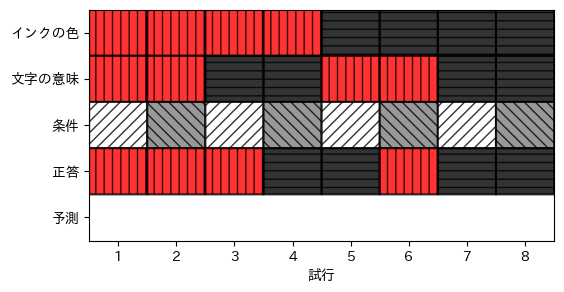

In [ ]:
#@title ストループ課題データセットの可視化
plot_stroop(inputs=inputs, targets=targets)

In [ ]:
#@title パーセプトロンのインスタンス化

# パーセプトロンのインスタンス化（重みはランダムに決まる）
# 今回は入力次元は3(インクの色，文字の意味，条件)
# 出力次元は1(回答の色)
perceptron_stroop = Perceptron(
    dim_input=3,
    dim_output=1,
)

predictions tensor([[0.4865],
        [0.4882],
        [0.4858],
        [0.4875],
        [0.4845],
        [0.4862],
        [0.4839],
        [0.4856]], grad_fn=<SigmoidBackward0>)


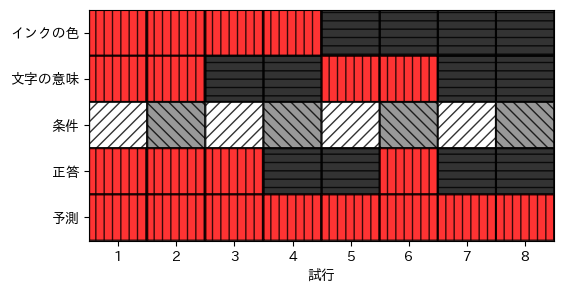

In [ ]:
#@title 予測値のプロット（学習前）
# Numpy型データをPyTorch型データに変換
inputs_torch = torch.from_numpy(
    inputs).to(torch.float32)

# 予測を実行
predictions = perceptron_stroop(inputs_torch)

# 予測結果をプリント
print('predictions', predictions)

# 予測結果をプロット
plot_stroop(
    inputs=inputs,
    targets=targets,
    predictions=predictions,
)

# 誤差逆伝播法

In [ ]:
#@title パーセプトロンの学習用関数の定義

def train_perceptron(net,  # [1] 学習用関数の引数を定める
                     inputs,
                     targets,
                     epoch_length,
                     lr):
    """多層パーセプトロンの学習を実行する関数

    Parameters
    ----------
    net : nn.Module
        学習対象となるパーセプトロン
    inputs : torch.Tensor
        パーセプトロンへの入力
    targets : torch.Tensor
        入力に対する正答データ
    epoch_length : int
        学習の繰り返し回数
    lr : float
        確率的勾配降下法の学習率

    Returns
    -------
    net : nn.Module
        学習済みパーセプトロン
    losses : list of float
        学習時の損失を保存したリスト
    """
    # [2] 学習のための設定
    # 最適化手法(確率的勾配降下法)をインスタンス化
    # 引数には学習の対象となるパラメータと学習率を与える
    optimizer = optim.SGD(net.parameters(), lr=lr)

    # 損失関数(最小二乗誤差)をインスタンス化
    # ゼロイチ予測の場合クロスエントロピー損失が適切だが今回は簡便にMSEを用いる
    criterion = nn.MSELoss()
    # 学習時の損失保存用リスト
    losses = []

    # [3] 学習のメインとなる繰り返し計算
    for epoch in range(1, epoch_length + 1):
        optimizer.zero_grad()  # 勾配をリセット
        outputs = net(inputs)  # 予測を実行
        loss = criterion(outputs, targets)  # 損失の計算
        loss.backward()  # 誤差逆伝播による勾配の計算
        optimizer.step()  # 勾配にもとづきパラメータを更新
        losses.append(  # 各エポックにおける損失を保存
            loss.item()  # .item()により値にのみ取得
        )
        if epoch % 1000 == 0:
            # 1000エポックごとに損失をプリントする
            print(epoch, ': ', loss.item())
    return net, losses

In [ ]:
#@title 多層パーセプトロンの学習を実行
# ストループ課題データの取得
inputs, targets = load_stroop_dataset()

# Numpy型のデータをPyTorch型に変換
inputs_torch = torch.tensor(inputs, dtype=torch.float32)
targets_torch = torch.tensor(targets, dtype=torch.float32)

# パーセプトロンのインスタンス化
perceptron_stroop = Perceptron(dim_input=3, dim_output=1)

# 学習を実行
perceptron_stroop, losses = train_perceptron(
    net=perceptron_stroop,  # 多層パーセプトロン
    inputs=inputs_torch,  # 入力データ
    targets=targets_torch,  # 正答データ
    epoch_length=5000,  # 学習の繰り返し回数
    lr=0.5  # 学習率
)

1000 :  0.12711934745311737
2000 :  0.0037610919680446386
3000 :  0.0010799594456329942
4000 :  0.0005885076825506985
5000 :  0.00039526569889858365


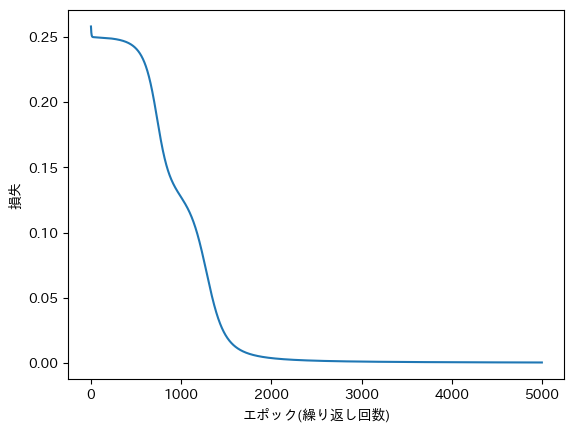

In [ ]:
#@title 学習曲線をプロット
plt.plot(range(len(losses)), losses)
plt.xlabel('エポック(繰り返し回数)')
plt.ylabel('損失')
plt.show()

predictions [[0.00608163]
 [0.00323163]
 [0.0256419 ]
 [0.9720872 ]
 [0.97241926]
 [0.0288709 ]
 [0.991865  ]
 [0.9959259 ]]


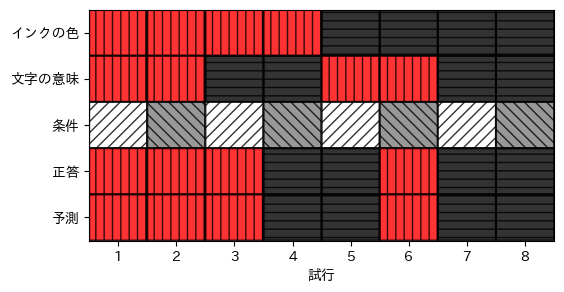

In [ ]:
#@title 予測値のプロット（学習後）

# 学習後のパーセプトロンによる予測を実行
predictions = perceptron_stroop(inputs_torch)

# 予測結果から勾配情報を削除しNumpy型に変換
predictions = predictions.detach().numpy()

# 予測した値をプリントし確認する
print('predictions', predictions)

# ストループ課題の結果を可視化
plot_stroop(
    inputs=inputs,
    targets=targets,
    predictions=predictions,
)

# 追跡眼球運動課題の実装

In [ ]:
#@title 1本のリサジュー曲線を作成する関数を定義

def generate_lissajous(duration,
                       amplitude_x=1,
                       amplitude_y=1,
                       freq_x=1,
                       freq_y=1,
                       delta=0):
    """1本のリサジュー曲線を作成

    Parameters
    ----------
    duration : int
        リサジュー曲線のタイムテップ数
    amplitude_x : float
        x軸の振幅
    amplitude_y : float
        y軸の振幅
    freq_x: float
        x軸の周波数
    freq_y: float
        y軸の周波数
    delta: float
        2つの正弦波の位相差

    Returns
    -------
    seq : np.ndarray
        1本のリサジュー曲線
    """
    # 評価する時間を作成
    times = np.linspace(1, duration, duration)

    # 180ステップで時刻が円周率になるように調整
    times = (times/180) * np.pi

    # リサジュー曲線を作成. 式(4-4)に相当
    x = amplitude_x * np.sin(freq_x*times)
    y = amplitude_y * np.sin(freq_y*times+delta)

    # 時刻 x 観測次元に整形
    seq = np.vstack([x, y]).T
    return seq

In [ ]:
#@title リサジュー曲線のプロット用関数
def plot_lissajous(lissajous):
    """リサジュー曲線をプロット

    Parameters
    ----------
    lissajous : np.ndarray
        1本のリサジュー曲線
    """
    fig = plt.figure(figsize=(16, 3))
    ax1 = fig.add_subplot(1, 5, (1))
    ax2 = fig.add_subplot(1, 5, (2, 5))
    ax1.plot(lissajous[:, 0], lissajous[:, 1], color='tab:gray')
    ax1.set_title('平面図')
    ax2.plot(lissajous[:, 0], color='tab:orange', linestyle='solid', label='x')
    ax2.plot(lissajous[:, 1], color='black', linestyle='solid', label='y')
    ax2.legend()
    ax2.set_title('シーケンス図')
    plt.show()

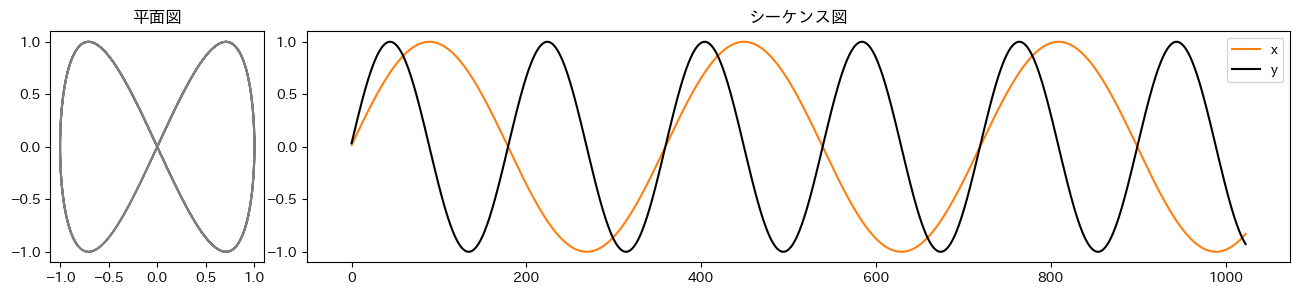

In [ ]:
#@title リサジュー曲線の動作検証1
# 動作確認のためにパラメータの値を1,2と設定してプロットしてみる
seq = generate_lissajous(
    duration=1024, freq_x=1, freq_y=2)
plot_lissajous(lissajous=seq)

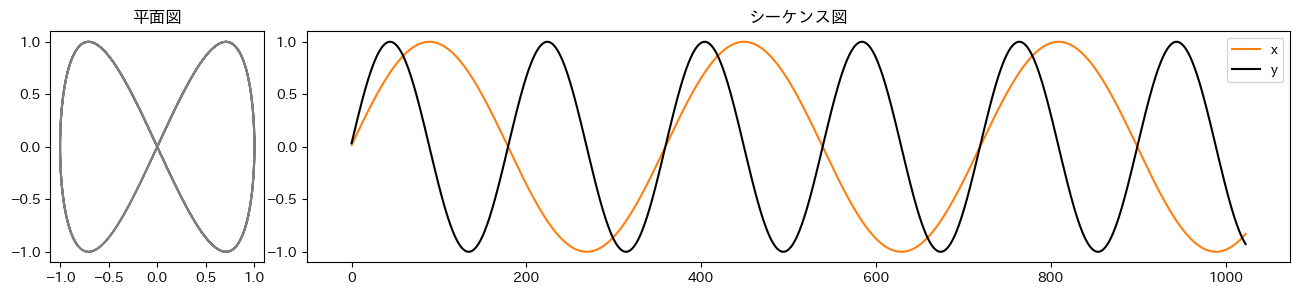

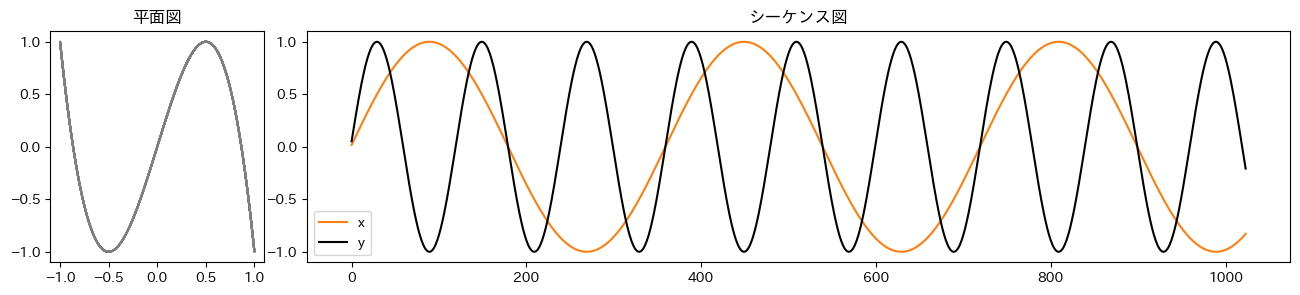

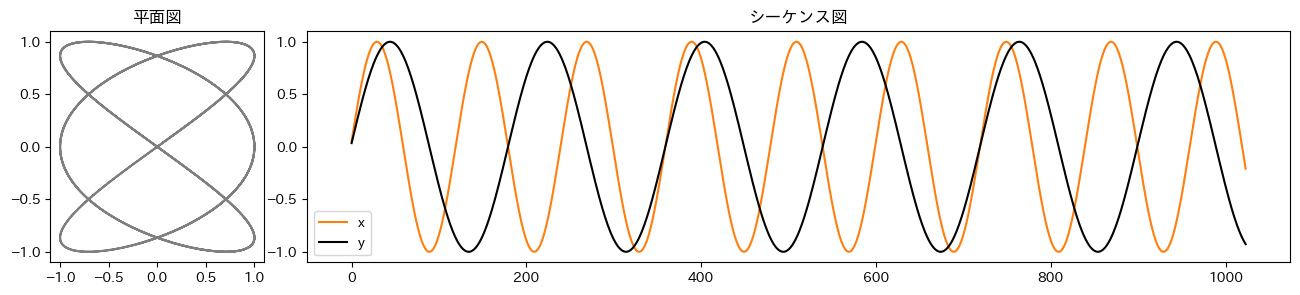

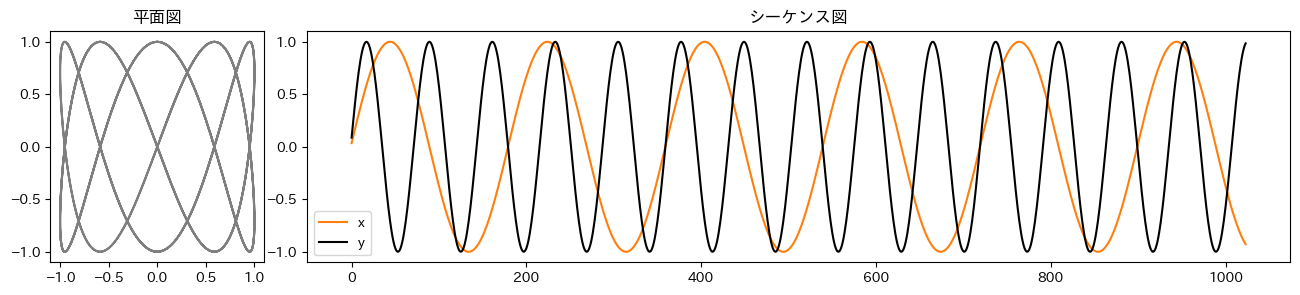

In [ ]:
#@title リサジュー曲線の動作検証2
# パラメータの値を適当に設定してプロットしてみる
params = [[1, 2], [1, 3], [3, 2], [2, 5]]
for param in params:
    seq = generate_lissajous(
        duration=1024,
        freq_x=param[0],
        freq_y=param[1]
    )
    plot_lissajous(lissajous=seq)

In [ ]:
#@title リサジュー曲線用データセットの構築
def load_lissajous_dataset(duration, num_seq):
    """リサジュー曲線のデータセットを作成

    Parameters
    ----------
    duration : int
        リサジュー曲線のステップ数
    num_seq : int
        リサジュー曲線の本数

    Returns
    -------
    seqs : np.ndarray
        複数本のリサジュー曲線を束ねたデータセット
        サイズはnum_seq x duration x 2
    """
    # 生成したシーケンスの保存用リスト
    seqs = []

    # 1から32までの整数から要素数が2となる直積を計算し，
    # 網羅的に設定値を含むリストを作成。
    params = list(itertools.product(
        range(1, 32), range(1, 32)))

    # x, y軸の一方に高い周波数が生じることを防ぐためにソート
    params_sum = [sum(param) for param in params]
    params = np.array(params)[
        np.argsort(params_sum)].tolist()
    # print(len(params), params)

    for i in range(num_seq):
        seq = generate_lissajous(
            duration=duration,
            # シグモイド関数の値域(0から1)よりも少し狭くする
            amplitude_x=0.3,
            amplitude_y=0.3,
            freq_x=params[i][0],
            freq_y=params[i][1],
            # 位相差は0に設定
            delta=0,
        )

        # シグモイド関数の値域に収まるように調整
        seq = seq + 0.5

        # 作成した一本のシーケンスを保存
        seqs.append(seq)
    return np.array(seqs)

sequence shape: (128, 512, 2)


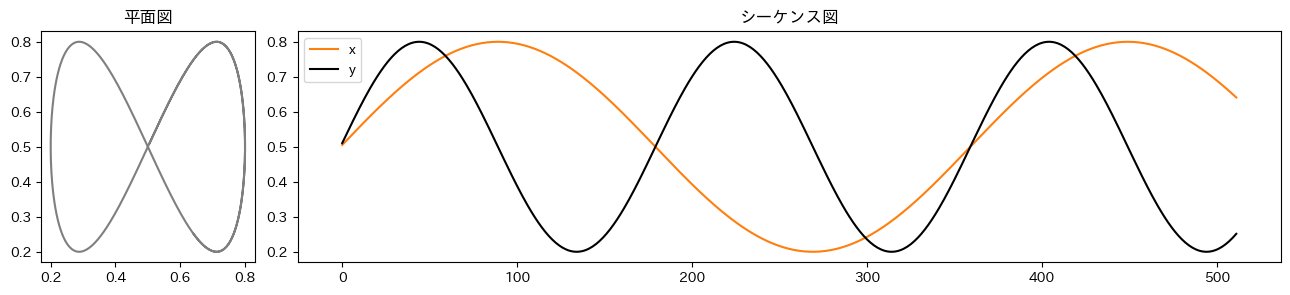

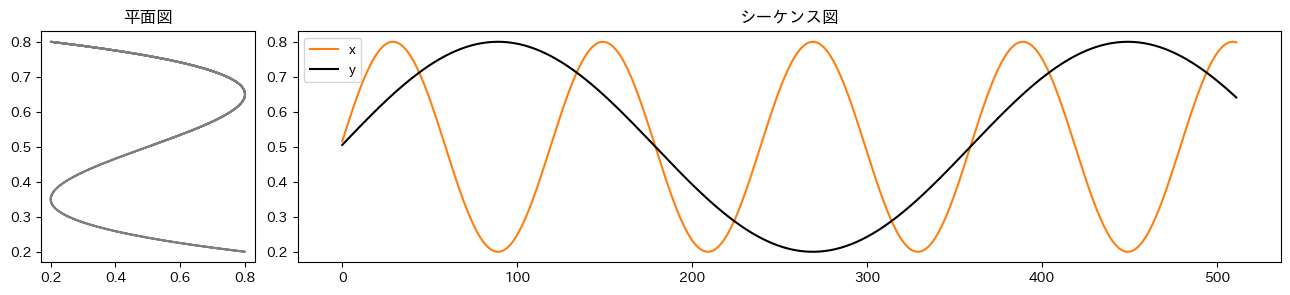

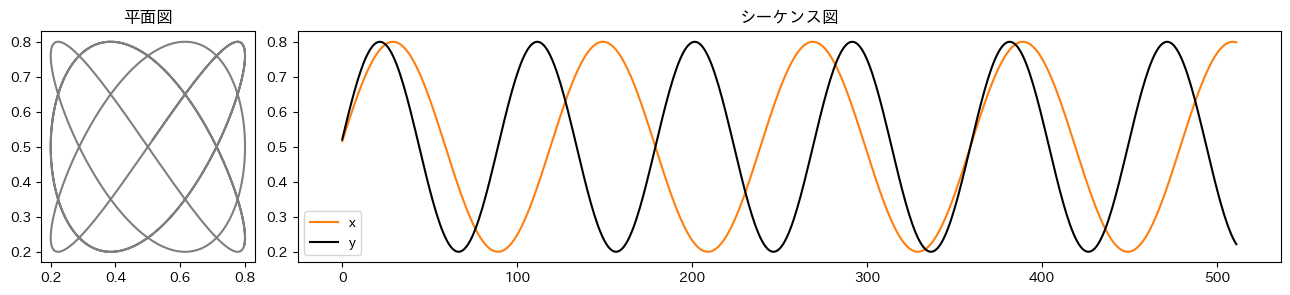

In [ ]:
#@title リサジュー曲線データセットの動作検証

# データセットを作成
seqs = load_lissajous_dataset(
    duration=512, num_seq=128)

# データのサイズをチェック
print('sequence shape:', seqs.shape)

# ためしにシーケンスをプロット
for idx in [1, 4, 16]:
    plot_lissajous(lissajous=seqs[idx, :, :])

# 再起型ニューラルネットワークモデル

## CTRNNセルとCTRNNの実装

In [ ]:
#@title CTRNNセルを実装
class CellCTRNN(nn.Module):
    """連続時間型RNNのセル
    """
    # [1] 初期化関数の定義
    def __init__(self, dim_inputs, dim_context, tau):
        """連続時間型RNNのセルの初期化関数

        Parameters
        ----------
        dim_input : int
            連続時間型RNNの入力次元
        dim_output : int
            連続時間型RNNの出力次元
        tau : float
            時定数
        """
        super().__init__()

        # 初期化関数に渡された設定値を保存しておく
        self.dim_inputs = dim_inputs
        self.dim_context = dim_context
        self.tau = tau

        # 線形層のインスタンス化
        self.layer_context = nn.Linear(
            dim_context, dim_inputs + dim_context)
        self.layer_inputs = nn.Linear(
            dim_inputs, dim_inputs + dim_context)

        # 活性化関数のインスタンス化
        self.activation = nn.Sigmoid()

    def forward(self, inputs, context, internal):
        """連続時間型RNNのセルの前向き計算

        Parameters
        ----------
        inputs : torch.Tensor
            連続時間型RNNの1時刻の入力
        context : torch.Tensor
            連続時間型RNNの1時刻の文脈層
        internal : torch.Tensor
            連続時間型RNNの1時刻の内部状態

        Returns
        -------
        outputs : torch.Tensor
            連続時間型RNNの1時刻の出力
        context : torch.Tensor
            連続時間型RNNの1時刻の文脈層
        internal : torch.Tensor
            連続時間型RNNの1時刻の内部状態
        """
        # [2] 内部状態の更新.
        # 式(4-5)に相当
        internal = (1-(1/self.tau))*internal \
            + (1/self.tau)*(
               self.layer_context(context) \
               + self.layer_inputs(inputs))

        # [3] 内部状態を出力用と文脈層用に分離する.
        # 式(4-7)に相当
        internal_outputs, internal_context = torch.split(
            internal,
            [self.dim_inputs, self.dim_context],
            dim=1
        )

        # [4] 活性化関数の処理.
        # 式(4-6)に相当
        context = self.activation(internal_context)
        outputs = self.activation(internal_outputs)

        # 出力に加えて次の時刻の計算で必要となる
        # context, internalも返り値にする
        return outputs, context, internal

In [ ]:
#@title CTRNNセルの動作検証

# CTRNNのセルをインスタンス化
# ひとまず入力次元を2, 文脈層の次元を4, 時定数を2で設定
cell = CellCTRNN(
    dim_inputs=2,
    dim_context=4,
    tau=2,
)

# 入力と文脈層の初期値を決める
inputs = torch.tensor(
    [[-0.02, -0.03]])
context = torch.tensor(
    [[0.01, 0.02, 0.03, 0.04]])
internal = torch.tensor(
    [[0.01, 0.02, 0.03, 0.04, 0.05, 0.06]])

# 数回分の計算を繰り返す
for step in range(1, 11):
    # 1時点の前向き計算を実行
    inputs, context, internal = cell(inputs, context, internal)
    print('step:', step, 'inputs:', inputs, 'internal:', internal)

step: 1 inputs: tensor([[0.3933, 0.5434]], grad_fn=<SigmoidBackward0>) internal: tensor([[-0.4336,  0.1740, -0.2068, -0.0371,  0.1625, -0.0626]],
       grad_fn=<AddBackward0>)
step: 2 inputs: tensor([[0.3192, 0.5547]], grad_fn=<SigmoidBackward0>) internal: tensor([[-0.7575,  0.2195, -0.2443,  0.1073,  0.0783, -0.6145]],
       grad_fn=<AddBackward0>)
step: 3 inputs: tensor([[0.2903, 0.5563]], grad_fn=<SigmoidBackward0>) internal: tensor([[-0.8937,  0.2260, -0.3200,  0.1873,  0.0101, -0.8503]],
       grad_fn=<AddBackward0>)
step: 4 inputs: tensor([[0.2782, 0.5551]], grad_fn=<SigmoidBackward0>) internal: tensor([[-0.9536,  0.2214, -0.3835,  0.2283, -0.0351, -0.9528]],
       grad_fn=<AddBackward0>)
step: 5 inputs: tensor([[0.2727, 0.5536]], grad_fn=<SigmoidBackward0>) internal: tensor([[-0.9808,  0.2154, -0.4272,  0.2481, -0.0623, -0.9976]],
       grad_fn=<AddBackward0>)
step: 6 inputs: tensor([[0.2703, 0.5524]], grad_fn=<SigmoidBackward0>) internal: tensor([[-0.9933,  0.2105, -0.4547

In [ ]:
#@title CTRNNを実装
class CTRNN(nn.Module):
    """連続時間型RNN
    """
    # [1] 初期化関数の定義
    def __init__(self, dim_inputs, dim_context, tau):
        """連続時間型RNNの初期化関数

        Parameters
        ----------
        dim_input : int
            連続時間型RNNの入力次元
        dim_output : int
            連続時間型RNNの出力次元
        tau : float
            時定数
        """
        super().__init__()
        # セルをインスタンス化
        self.cell = CellCTRNN(
            dim_inputs=dim_inputs,
            dim_context=dim_context,
            tau=tau
        )

    def get_initial_values(self, batch_size):
        """内部状態と文脈層の値を0で初期化

        Parameters
        ----------
        batch_size : int
            データ数(シーケンスの本数)

        Returns
        -------
        context : torch.Tensor
            初期ステップの文脈層
        internal : torch.Tensor
            初期ステップの内部状態
        """
        context = torch.zeros(
            batch_size, self.cell.dim_context)
        internal = torch.zeros(
            batch_size,
            self.cell.dim_inputs + self.cell.dim_context)
        return context, internal

    def forward(self, seq):
        """連続時間型RNNの前向き計算

        Parameters
        ----------
        seq : torch.tensor
            サイズはbatch x time x 入力
        Returns
        -------
        predictions: torch.tensor
            入力に対するRNNの予測
        """
        # 予測結果を保存する変数を準備
        predictions = torch.Tensor()

        # [2] 文脈層と内部状態を初期化
        context, internal = self.get_initial_values(
            batch_size=seq.size(0))

        # [3] 全時刻の計算
        for step in range(1, seq.size(1) + 1):
            # [4] 渡された全時刻シーケンスから現在の値を抽出
            inputs = seq[:, step - 1, :]

            # [5] セルを用いて一時点の計算を行う
            pred, context, internal = self.cell(
                inputs=inputs,
                context=context,
                internal=internal
            )

            # [6] 1時刻の結果を連結し全時刻にわたるデータを作成
            # シーケンス本数 x 1 x 入力次元に整形
            pred = torch.unsqueeze(pred, dim=1)
            # 全時刻の情報を保持するpredictionsに，
            # 一時点の計算結果であるpredを保存しておく
            predictions = torch.cat(
                [predictions, pred], dim=1)
        return predictions

## 学習と予測

In [ ]:
#@title 追跡眼球運動用のプロット関数
def plot_sequences(targets, predictions):
    """2本のシーケンスをプロットする

    Parameters
    ----------
    targets : np.ndarray
        正答となるシーケンス(リサジュー曲線)
    predictions : np.ndarray
        RNNの予測結果
    """
    fig = plt.figure(figsize=(16, 3))
    ax_plane = fig.add_subplot(1, 5, (1))
    ax_seq = fig.add_subplot(1, 5, (2, 5))

    ax_plane.plot(
        targets[:, 0], targets[:, 1],
        label='入力', color='tab:gray', linestyle='solid')
    ax_plane.plot(
        predictions[:, 0], predictions[:, 1],
        label='予測', color='tab:gray', linestyle='dashed')
    ax_plane.set_title('平面図')
    ax_plane.legend()
    ax_plane.set_xlim(0, 1)
    ax_plane.set_ylim(0, 1)

    ax_seq.plot(
        range(len(targets[:, 0])), targets[:, 0],
        label='入力 x', color='tab:orange', linestyle='solid')
    ax_seq.plot(
        range(len(targets[:, 0])), targets[:, 1],
        label='入力 y', color='black', linestyle='solid')
    ax_seq.plot(
        range(len(predictions[:, 0])), predictions[:, 0],
        label='予測 x', color='tab:orange', linestyle='dashed')
    ax_seq.plot(
        range(len(predictions[:, 0])), predictions[:, 1],
        label='予測 y', color='black', linestyle='dashed')
    ax_seq.set_title('シーケンス図')
    ax_seq.legend()
    ax_seq.set_ylim(0, 1)

    plt.show()

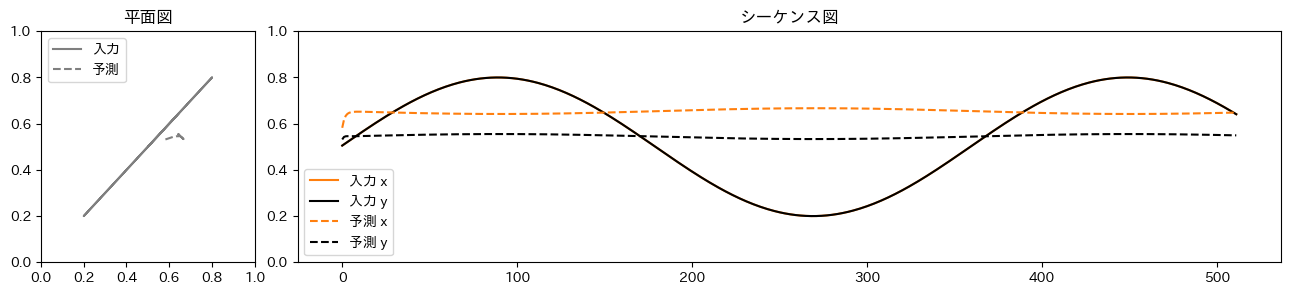

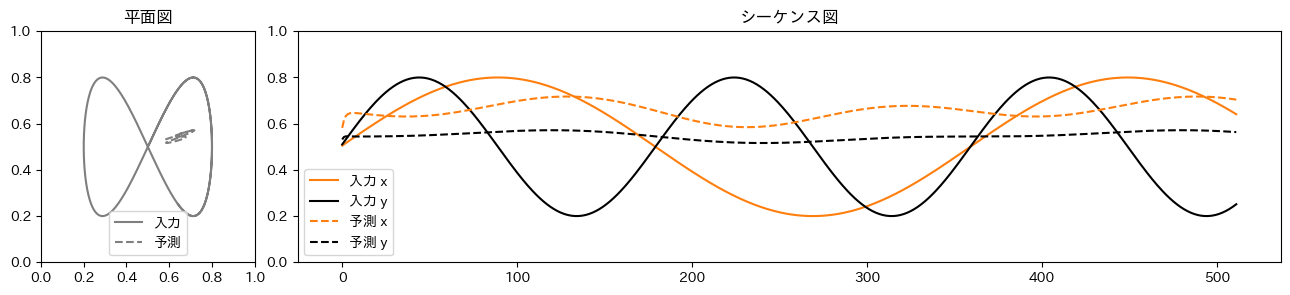

In [ ]:
#@title CTRNNによる追跡眼球運動（学習前）

# リサジュー曲線を作成
targets = load_lissajous_dataset(
    duration=512, num_seq=128)

# リサジュー曲線をPyTorchのデータ型に変換
targets_torch = torch.tensor(
    targets, dtype=torch.float32)

# 設定値を与えたうえでCTRNNをインスタンス化
# 今回は文脈層のユニット数を32, 時定数を2と設定
rnn = CTRNN(dim_inputs=2, dim_context=32, tau=2)

# CTRNNで予測
predictions_torch = rnn(targets_torch)

# PyTorch型データから勾配情報を削除しNumpy型データに変換
predictions = predictions_torch.detach().numpy()

# 予測結果をプロット
for idx in range(2):
    plot_sequences(
        targets=targets[idx, :, :],
        predictions=predictions[idx, :, :]
    )

In [ ]:
#@title 学習用関数の定義

def train_rnn(net, targets, epoch_length, lr):
    """RNNの学習を実行する関数

    Parameters
    ----------
    net : nn.Module
        学習対象となるRNN
    targets : torch.Tensor
        RNNの予測対象となるシーケンスデータ
    epoch_length : int
        学習の繰り返し回数
    lr : float
        確率的勾配降下法の学習率

    Returns
    -------
    net : nn.Module
        学習済みRNN
    losses : list of float
        学習時の損失を保存したリスト
    """
    # 学習のための設定
    # 最適化手法(確率的勾配降下法)をインスタンス化
    # 引数には学習の対象となるパラメータと学習率を与える
    optimizer = optim.SGD(net.parameters(), lr=lr)

    # 損失関数(最小二乗誤差)をインスタンス化
    criterion = nn.MSELoss()
    losses = []  # 学習時の損失保存用リスト

    # 学習のメインとなる繰り返し計算
    for epoch in range(1, epoch_length + 1):
        optimizer.zero_grad()  # 勾配をリセット
        predictions = net(targets)  # 予測を実行

        # [1] 損失の計算. ここだけパーセプトロンと異なる
        loss = criterion(
            # 予測値の最後の時刻以外を使用
            predictions[:, :-1, :],
            # 目標値の最初の時刻以外を使用
            targets[:, 1:, :]
        )
        loss.backward()  # 誤差逆伝播による勾配の計算
        optimizer.step()  # 勾配にもとづきパラメータを更新
        losses.append(  # 各エポックにおける損失を保存
            loss.item()  # .item()により値にのみ取得
        )
        if epoch % 1000 == 0:
            # 1000エポックごとに損失をプリントする
            print(epoch, ': ', loss.item())

    return net, losses

## 連続時間型RNNの学習実行

簡易な設定値の場合

- duration: 16
- num_seq: 2
- dim_context: 32
- tau: 2
- lr: 0.1
- epoch_length: 50000

（Google Colaboratory上で10分ほど）

In [ ]:
#@title CTRNNの学習実行
# リサジュー曲線を作成
targets = load_lissajous_dataset(
    duration=16, num_seq=2)

# リサジュー曲線をPyTorchのデータ型に変換
targets_torch = torch.tensor(
    targets, dtype=torch.float32, requires_grad=True)

# 設定値を与えたうえでCTRNNをインスタンス化
# 今回は文脈層のユニット数を32, 時定数を2と設定
rnn = CTRNN(dim_inputs=2, dim_context=32, tau=2)

# 学習を実行
rnn, losses = train_rnn(
    net=rnn,
    targets=targets_torch,
    epoch_length=50000,
    lr=0.1,
)

1000 :  0.0007582448306493461
2000 :  0.0006619539926759899
3000 :  0.0005941588315181434
4000 :  0.0005441735265776515
5000 :  0.0005056018708273768
6000 :  0.0004746131889987737
7000 :  0.0004488956765271723
8000 :  0.0004270313656888902
9000 :  0.0004081292718183249
10000 :  0.0003916039422620088
11000 :  0.00037705351132899523
12000 :  0.0003641841176431626
13000 :  0.0003527680819388479
14000 :  0.0003426189359743148
15000 :  0.0003335783549118787
16000 :  0.00032550867763347924
17000 :  0.00031828758073970675
18000 :  0.0003118078166153282
19000 :  0.00030597212025895715
20000 :  0.0003006944025401026
21000 :  0.0002959003031719476
22000 :  0.000291523669147864
23000 :  0.00028750512865372
24000 :  0.000283795059658587
25000 :  0.00028034919523634017
26000 :  0.0002771287108771503
27000 :  0.0002741031348705292
28000 :  0.0002712429850362241
29000 :  0.0002685254439711571
30000 :  0.0002659287420101464
31000 :  0.000263439113041386
32000 :  0.00026103886193595827
33000 :  0.00025

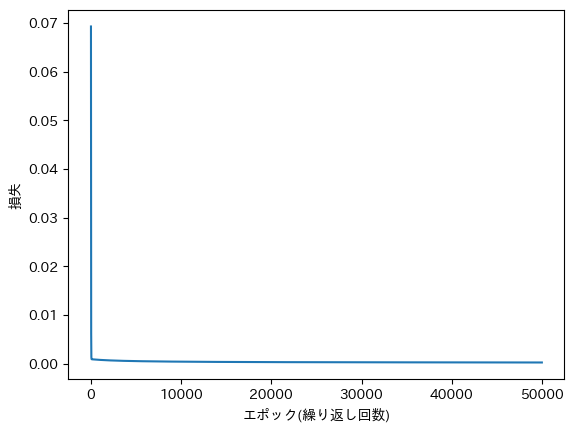

In [ ]:
plt.plot(losses)
plt.xlabel('エポック(繰り返し回数)')
plt.ylabel('損失')
plt.show()

### 学習済みパラメータを読み込む場合

大規模な設定値の場合

- duration: 512
- num_seq: 128
- dim_context: 32
- tau: 2
- lr: 0.1
- epoch_length: 500000

（著者らの環境では30時間くらい必要）

In [ ]:
# リサジュー曲線を作成
targets = load_lissajous_dataset(duration=512, num_seq=64)

# リサジュー曲線をPyTorchのデータ型に変換
targets_torch = torch.tensor(targets, dtype=torch.float32, requires_grad=True)

# GoogleDriveからダウンロードし名前を変更
!wget https://github.com/CPcolloquium/cp_programming_book/raw/main/4_Neural-network-model/parameters/ctrnn-0.1-512-128-500000.pth
!mv ctrnn-0.1-512-128-500000.pth ctrnn.pth

# カレントディレクトリのファイル一覧にダウンロードしたものが入っているかチェック
print('ダウンロードができたか確認')
!ls

# CTRNNをインスタンス化。
# 入力次元など学習済みパラメータの個数に関わる設定値は学習時と同じにする必要がある
rnn = CTRNN(dim_inputs=2, dim_context=32, tau=2)

# ファイルからパラメータを読み込む
params = torch.load('ctrnn.pth')

# CTRNNのインスタンスに学習済みパラメータをセットする
rnn.load_state_dict(params)

--2024-10-26 08:50:44--  https://github.com/CPcolloquium/cp_programming_book/raw/main/4_Neural-network-model/parameters/ctrnn-0.1-512-128-500000.pth
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CPcolloquium/cp_programming_book/main/4_Neural-network-model/parameters/ctrnn-0.1-512-128-500000.pth [following]
--2024-10-26 08:50:44--  https://raw.githubusercontent.com/CPcolloquium/cp_programming_book/main/4_Neural-network-model/parameters/ctrnn-0.1-512-128-500000.pth
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6789 (6.6K) [application/octet-stream]
Saving to: ‘ctrnn-0.1-512-128-500000.pth’

ct

<ipython-input-141-0466f3813742>:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  params = torch.load('ctrnn.pth')


<All keys matched successfully>

## 予測値のプロット（学習後）

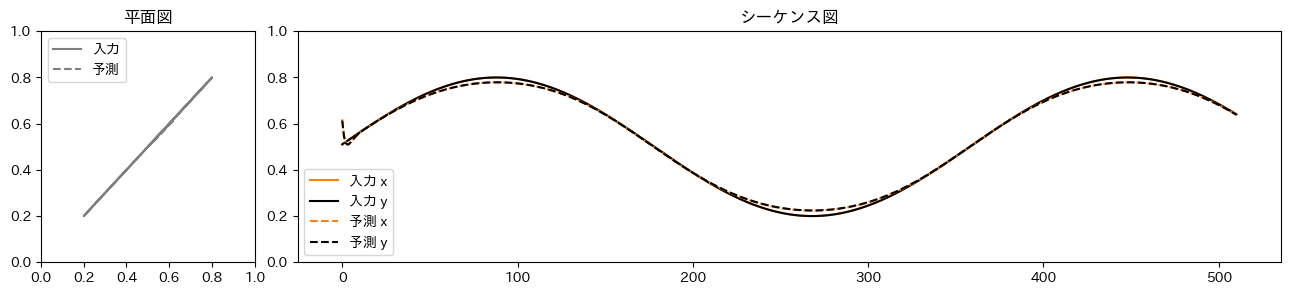

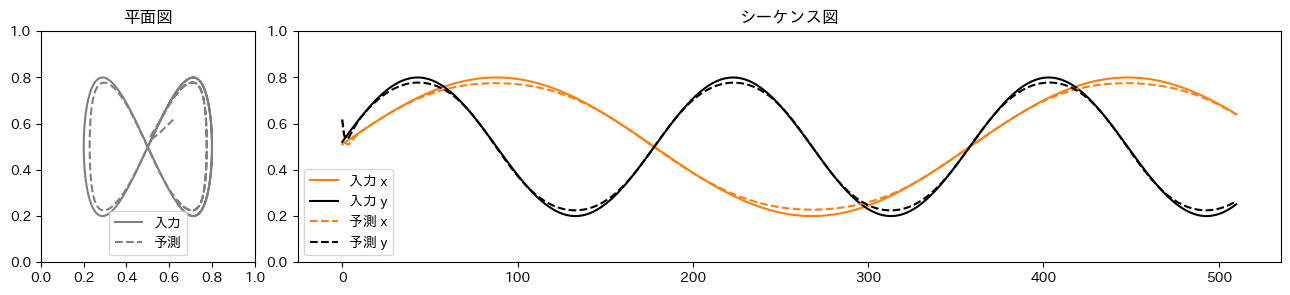

In [ ]:
# 学習後のモデルで予測をしてみる
predictions = rnn(targets_torch).detach().numpy()

# 学習後の予測値をプロットしてみる
for idx in range(2):
    plot_sequences(
        # 目標値の最初の時刻以外を使用
        targets=targets[idx, 1:, :],
        # 予測値の最後の時刻以外を使用
        predictions=predictions[idx, :-1, :]
    )

# 仮想障害実験

## 仮想障害用RNNの実装

In [ ]:
#@title 仮想障害用線形層
class AlteredLinear(nn.Linear):
    """仮想障害用の線形層

    一定の確率の下，線形層に結合の断絶を引き起こす

    Notes
    -----
    https://pytorch.org/docs/stable/_modules/torch/nn/modules/linear.html#Linear
    """
    def __init__(self, in_features, out_features):
        """仮想障害用の線形層の初期化関数

        Parameters
        ----------
        in_features : int
            入力次元数
        out_features : int
            出力次元数
        """
        super().__init__(
            in_features=in_features,
            out_features=out_features
        )
        self.init_disconnection_matrix(disconnection_prob=0.5)

    def init_disconnection_matrix(self, disconnection_prob):
        """結合の断絶を0か1でコーディングした配列を初期化

        Parameters
        ----------
        disconnection_prob : float
            断絶を起こす確率（0から1の値）
        """
        # 要素に結合の確率値(0から1)を有する配列を作成
        disconnection_prob_matrix = torch.full_like(
            self.weight,
            fill_value=disconnection_prob,
            dtype=torch.float
        )

        # 要素に断絶の値(0か1か)を有する配列を作成
        self.disconnection_matrix = torch.bernoulli(
            # 1を生成する確率を与えるため，減算を施す
            1 - disconnection_prob_matrix
        )
        # print(disconnection_matrix)

    def forward(self, input, disconnection=False):
        """仮想障害用の線形層の前向き計算

        disconnectionがFalseのときは通常の線形層の計算
        disconnectionがTrueのときは，結合の断絶を起こして線形層の計算を行う
        どのニューロンユニット間の結合を断絶するのかは，self.disconnection_matrixに従う

        Parameters
        ----------
        input : torch.Tensor
            入力
        disconnection : boolean
            線形層の計算で結合の断絶を引き起こすかどうか
        """
        if disconnection:
            # 断絶する場合にはself.weightそのものを
            # 使う代わりに， self.weightに断絶の配列を乗じる
            weight = self.disconnection_matrix * self.weight
        else:
            # 断絶しない場合には本来のweightを使う
            weight = self.weight

        # 線形層の計算
        x = F.linear(input, weight, self.bias)
        return x

In [ ]:
#@title 仮想障害用CTRNNセル
class AlteredCellCTRNN(nn.Module):
    """仮想障害用連続時間型RNNのセル
    """

    def __init__(self, dim_inputs, dim_context, tau):
        """仮想障害用連続時間型RNNのセルの初期化関数

        Parameters
        ----------
        dim_input : int
            連続時間型RNNの入力次元
        dim_output : int
            連続時間型RNNの出力次元
        tau : float
            時定数
        """
        super().__init__()

        # 初期化関数に渡された設定値を保存しておく
        self.dim_inputs = dim_inputs
        self.dim_context = dim_context
        self.tau = tau

        # 線形層のインスタンス化
        # [1] 使用する線形層を実装したAlteredLinearに差し替える
        self.layer_context = AlteredLinear(
            dim_context, dim_inputs + dim_context)
        self.layer_inputs = nn.Linear(
            dim_inputs, dim_inputs + dim_context)

        # 活性化関数のインスタンス化
        self.activation = nn.Sigmoid()

    def forward(self, inputs, context, internal, disconnection=False):
        """連続時間型RNNのセルの前向き計算

        Parameters
        ----------
        inputs : torch.Tensor
            連続時間型RNNの1時刻の入力
        context : torch.Tensor
            連続時間型RNNの1時刻の文脈層
        internal : torch.Tensor
            連続時間型RNNの1時刻の内部状態

        Returns
        -------
        outputs : torch.Tensor
            連続時間型RNNの1時刻の出力
        context : torch.Tensor
            連続時間型RNNの1時刻の文脈層
        internal : torch.Tensor
            連続時間型RNNの1時刻の内部状態
        """

        # 内部状態の更新
        internal = (1 - (1 / self.tau)) * internal \
            + (1 / self.tau) * (
                self.layer_context(
                    context, disconnection=disconnection)  \
                + self.layer_inputs(inputs)
            )

        # 内部状態を出力用と文脈層用に分離する
        internal_outputs, internal_context = torch.split(
            internal,
            [self.dim_inputs, self.dim_context],
            dim=1
        )

        # 活性化関数の処理
        context = self.activation(internal_context)
        outputs = self.activation(internal_outputs)

        # 出力に加えて次の時刻の計算で必要となる
        # context, internalも返り値にする
        return outputs, context, internal

### 時系列全体のモデルを実装

In [ ]:
class AlteredCTRNN(nn.Module):
    def __init__(self, dim_inputs, dim_context, tau):
        """仮想障害用連続時間型RNNの初期化関数

        Parameters
        ----------
        dim_input : int
            連続時間型RNNの入力次元
        dim_output : int
            連続時間型RNNの出力次元
        tau : float
            時定数
        """
        super().__init__()
        self.cell = AlteredCellCTRNN(
            dim_inputs=dim_inputs,
            dim_context=dim_context,
            tau=tau,
        )

    def get_initial_values(self, batch_size):
        """内部状態と文脈層の値を0で初期化

        Parameters
        ----------
        batch_size : int
            データ数(シーケンスの本数)

        Returns
        -------
        context : torch.Tensor
            初期ステップの文脈層
        internal : torch.Tensor
            初期ステップの内部状態
        """
        context = torch.zeros(
            batch_size, self.cell.dim_context)
        internal = torch.zeros(
            batch_size,
            self.cell.dim_inputs + self.cell.dim_context)
        return context, internal

    def forward(self, seq):
        """連続時間型RNN(仮想障害)の通常用前向き計算

        Parameters
        ----------
        seq : torch.tensor
            サイズはbatch x time x 入力

        Returns
        -------
        predictions: torch.tensor
            入力に対するRNNの予測
        """
        # 予測結果を保存する変数を準備
        predictions = torch.Tensor()

        # 文脈層と内部状態を初期化
        context, internal = self.get_initial_values(
            batch_size=seq.size(0))

        for step in range(1, seq.size(1) + 1):
            # 渡された全時刻シーケンスから現在の値を抽出
            inputs = seq[:, step - 1, :]

            # 1時点における予測
            pred, context, internal = self.cell(
                inputs=inputs,
                context=context,
                internal=internal
            )

            # 1時刻の結果を連結し全時刻にわたるデータを作成
            pred = torch.unsqueeze(pred, dim=1)
            predictions = torch.cat(
                [predictions, pred], dim=1)
        return predictions

    def forward_noise(self, seq, noise_scale=0.01):
        """入力層におけるノイズ混入での前向き計算

        Parameters
        ----------
        seq : torch.tensor
            サイズはbatch x time x 入力
        noise_scale : float
            入力層におけるノイズの標準偏差

        Returns
        -------
        predictions: torch.tensor
            入力に対するRNNの予測
        """
        # 予測結果を保存する変数を準備
        predictions = torch.Tensor()

        # 文脈層と内部状態を初期化
        context, internal = self.get_initial_values(
            batch_size=seq.size(0))

        for step in range(1, seq.size(1) + 1):
            # 渡された全時刻シーケンスから現在の値を抽出
            inputs = seq[:, step - 1, :]

            # [1] ノイズの生成と加算
            noises = torch.normal(0, noise_scale, inputs.shape)
            inputs = inputs + noises

            # セルを用いて一時点の計算を行う
            pred, context, internal = self.cell(
                inputs=inputs,
                context=context,
                internal=internal
            )

            # 1時刻の結果を連結し全時刻にわたるデータを作成
            pred = torch.unsqueeze(pred, dim=1)
            predictions = torch.cat(
                [predictions, pred], dim=1)
        return predictions

    def forward_delay(self,
                      seq,
                      delay_time=2,
                      abnormal_prob=0.1):
        """文脈層の信号遅延の場合の前向き計算

        Parameters
        ----------
        seq : torch.tensor
            サイズはbatch x time x 入力
        delay_time : int
            時間遅延のタイムステップ数
        abnormal_prob : float
            時間遅延を引き起こす確率

        Returns
        -------
        predictions: torch.tensor
            入力に対するRNNの予測
        """
        # 予測結果を保存する変数を準備
        predictions = torch.Tensor()

        # 文脈層と内部状態を初期化
        context, internal = self.get_initial_values(
            batch_size=seq.size(0))

        # [1] 遅延信号として保存するリストを準備
        # context_delayは，先頭に（インデックスが小さい位置）に
        # 古い時間のcontextを保持するリスト
        context_delay = []

        for step in range(1, seq.size(1) + 1):
            # 渡された全時刻シーケンスから現在の値を抽出
            inputs = seq[:, step - 1, :]

            # [2] 一番新しい時間のcontextを追加
            context_delay.append(context)
            # [3] 一番古い時間のcontextを削除
            if step > delay_time:
                _ = context_delay.pop(0)

            # [4] 遅延信号を使うかどうかを判定
            if random.random() <= abnormal_prob:
                # 一番古い時間のcontextに差し替える
                #print('sashikae')
                context_used = context_delay[0]
            else:
                # 通常通りのcontextを用いる
                #print('tuuzyo')
                context_used = context_delay[-1]
            #print(
            #    'context_delay: ', context_delay,
            #    context_used': ', context_used,
            #)
            # [5] セルを用いて一時点の計算を行う
            pred, context, internal = self.cell(
                inputs=inputs,
                context=context_used,
                internal=internal,
            )

            # 1時刻の結果を連結し全時刻にわたるデータを作成
            pred = torch.unsqueeze(pred, dim=1)
            predictions = torch.cat(
                [predictions, pred], dim=1)
        return predictions


    def forward_disconnection(self,
                              seq,
                              disconnection_prob=0.1):
        """文脈層の結合断絶の場合の前向き計算

        Parameters
        ----------
        seq : torch.tensor
            サイズはbatch x time x 入力
        disconnection_prob : float
            結合断絶を引き起こす際に，どれくらいの数の重み付け係数を0にするか

        Returns
        -------
        predictions: torch.tensor
            入力に対するRNNの予測
        """
        # 予測結果を保存する変数を準備
        predictions = torch.Tensor()

        # 文脈層と内部状態を初期化
        context, internal = self.get_initial_values(
            batch_size=seq.size(0))

        # 重みづけ係数における結合断絶する位置を初期化
        # RNNのセル(self.cell)が所持する文脈層の線形層
        # (layer_context)にアクセスし，関数を呼び出す
        self.cell.layer_context.init_disconnection_matrix(
            disconnection_prob=disconnection_prob
        )

        for step in range(1, seq.size(1) + 1):
            # 渡された全時刻シーケンスから現在の値を抽出
            inputs = seq[:, step - 1, :]

            # [1] セルを用いて一時点の計算を行う
            pred, context, internal = self.cell(
                inputs=inputs,
                context=context,
                internal=internal,
                # 以下をTrueに変更し全結合の計算で断絶を行う
                disconnection=True
            )

            # 1時刻の結果を連結し全時刻にわたるデータを作成
            pred = torch.unsqueeze(pred, dim=1)
            predictions = torch.cat(
                [predictions, pred], dim=1)
        return predictions

## 仮想障害シミュレーション：学習編

In [ ]:
#@title 通常条件での学習実行

# リサジュー曲線を作成
targets = load_lissajous_dataset(
    duration=16,
    num_seq=2,
)

# リサジュー曲線をPyTorchのデータ型に変換
targets_torch = torch.tensor(
    targets,
    dtype=torch.float32,
    requires_grad=True,
)

# 設定値を与えたうえでAlteredCTRNNをインスタンス化
rnn_altered = AlteredCTRNN(
    dim_inputs=2,
    dim_context=32,
    tau=2,
)

# 学習を実行
rnn_altered, losses = train_rnn(
    net=rnn_altered,
    targets=targets_torch,
    epoch_length=50000,
    lr=0.1,
)

1000 :  0.000746249221265316
2000 :  0.0006767633021809161
3000 :  0.0006274395855143666
4000 :  0.0005902007105760276
5000 :  0.0005605664337053895
6000 :  0.0005359891802072525
7000 :  0.0005149805219843984
8000 :  0.0004966457490809262
9000 :  0.00048042385606095195
10000 :  0.0004659431579057127
11000 :  0.0004529437283053994
12000 :  0.000441229494754225
13000 :  0.0004306446644477546
14000 :  0.0004210584447719157
15000 :  0.00041235698154196143
16000 :  0.0004044397210236639
17000 :  0.00039721763459965587


KeyboardInterrupt: 

In [ ]:
#@title 学習済みパラメータを読み込む場合

# リサジュー曲線を作成
targets = load_lissajous_dataset(duration=512, num_seq=64)

# リサジュー曲線をPyTorchのデータ型に変換
targets_torch = torch.tensor(targets, dtype=torch.float32, requires_grad=True)

# GoogleDriveからダウンロードし名前を変更 (通常のCTRNNと同じ)
!wget https://github.com/CPcolloquium/cp_programming_book/raw/main/4_Neural-network-model/parameters/ctrnn-0.1-512-128-500000.pth
!mv ctrnn-0.1-512-128-500000.pth ctrnn.pth

# カレントディレクトリのファイル一覧にダウンロードしたものが入っているかチェック
print('ダウンロードができたか確認')
!ls

# AllteredCTRNNをインスタンス化。
# 入力次元など学習済みパラメータの個数に関わる設定値は学習時と同じにする必要がある
rnn_altered = AlteredCTRNN(dim_inputs=2, dim_context=32, tau=2)

# ファイルからパラメータを読み込む
params = torch.load('ctrnn.pth')

# CTRNNのインスタンスに学習済みパラメータをセットする
rnn_altered.load_state_dict(params)

--2024-10-26 08:50:50--  https://github.com/CPcolloquium/cp_programming_book/raw/main/4_Neural-network-model/parameters/ctrnn-0.1-512-128-500000.pth
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CPcolloquium/cp_programming_book/main/4_Neural-network-model/parameters/ctrnn-0.1-512-128-500000.pth [following]
--2024-10-26 08:50:50--  https://raw.githubusercontent.com/CPcolloquium/cp_programming_book/main/4_Neural-network-model/parameters/ctrnn-0.1-512-128-500000.pth
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6789 (6.6K) [application/octet-stream]
Saving to: ‘ctrnn-0.1-512-128-500000.pth’

ct

<ipython-input-142-f0d6012e100d>:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  params = torch.load('ctrnn.pth')


<All keys matched successfully>

## 仮想障害シミュレーション：予測編

In [ ]:
#@title 通常条件での予測

# 前向き計算による予測
predictions_normal = rnn_altered(
    targets_torch
).detach().numpy()

# 予測結果をプロット
for idx in range(2):
    plot_sequences(
        targets=targets[idx, 1:, :],
        predictions=predictions_normal[idx, :-1, :],
    )

In [ ]:
#@title ノイズの混入での予測

# 前向き計算による予測
predictions_noise = rnn_altered.forward_noise(
    targets_torch,
    noise_scale=0.01,  # 仮想障害実験ではここを調整！
).detach().numpy()

# 予測結果をプロット
for idx in range(2):
    plot_sequences(
        targets=targets[idx, 1:, :],
        predictions=predictions_noise[idx, :-1, :],
    )

In [ ]:
#@title 信号の遅延での予測

# 前向き計算による予測
delay_time = 32  # 仮想障害実験ではここを調整！
predictions_delay = rnn_altered.forward_delay(
    targets_torch,
    delay_time=delay_time,
    abnormal_prob=0.1,  # 仮想障害実験ではここを調整！
).detach().numpy()

# 予測結果をプロット
for idx in range(2):
    plot_sequences(
        targets=targets[idx, delay_time+1:, :],
        predictions=predictions_delay[idx, delay_time:-1, :]
    )

In [ ]:
#@title シナプス結合の切断での予測

# 前向き計算による予測
predictions_disconnection = rnn_altered.forward_disconnection(
    targets_torch,
    disconnection_prob=0.2,  # 仮想障害実験ではここを調整！
).detach().numpy()

# 予測結果をプロット
for idx in range(2):
    plot_sequences(
        targets=targets[idx, 1:, :],
        predictions=predictions_disconnection[idx, :-1, :]
    )

# コラム

## 勾配降下法のフィギュア作成

In [ ]:
def funtest(x):
    return x*x*x*x + 4*x*x*x + 3*x*x - x
def derivative(x):
    return 4*x*x*x + 12*x*x + 6*x - 1
def tangent(point, lin):
    return derivative(point)*lin - derivative(point)*point + funtest(point)

lin_whole = np.linspace(-3, 1, 1000)
point = -1.4
lin_tangent = np.linspace(point - 1.0, point + 1.0, 1000)
print(point, funtest(point), derivative(point))

plt.plot(lin_whole, funtest(lin_whole), color='black', linewidth=0.8)
plt.scatter(point, funtest(point), s=30, color='tab:orange')
plt.plot(lin_tangent, tangent(point=point, lin=lin_tangent), color='tab:orange', linewidth=1.0, linestyle='dashed')
plt.xlabel('重み付け係数（パラメータ）')
plt.ylabel('損失関数（誤差）')
plt.show()